**Exploratory Analysis - Sales Customers**

In this project, an exploratory analysis was performed on data downloaded from ISTC - Big Data.

The data is referenced from a spreadsheet market about sales to customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset from ISTC
sales = pd.read_csv('/content/drive/My Drive/datasets/wholesale_customers_data.csv')

In [3]:
# Checking 5 first data
sales.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# Dataframe shape
sales.shape

(440, 8)

In [6]:
# General information about dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
# Descritive informations about dataset
sales.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
# Checking for null values
sales.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

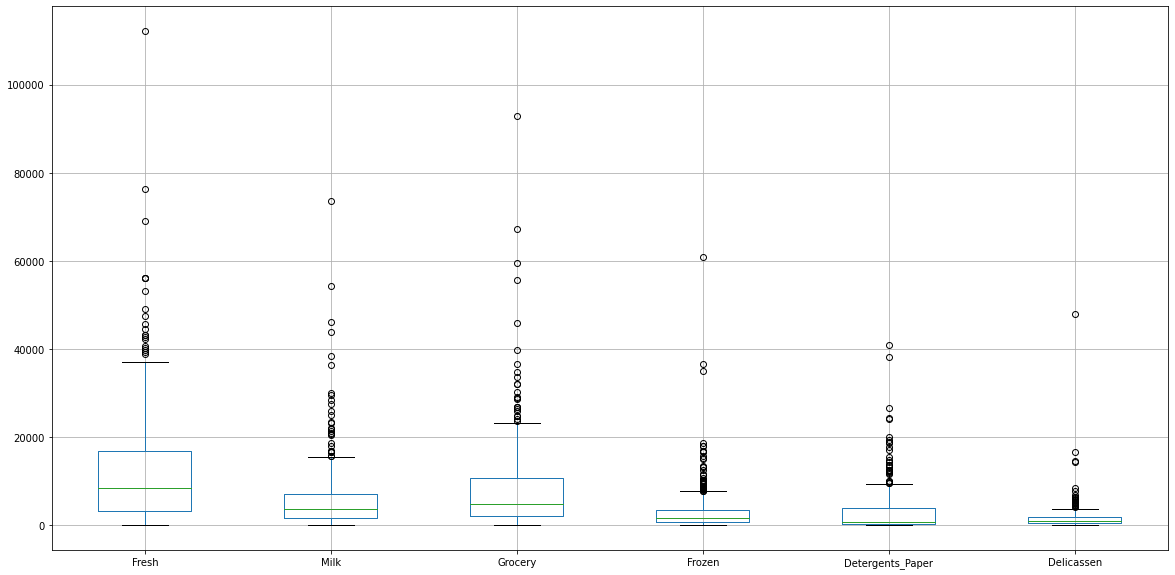

In [24]:
# Boxplotting based on max sales values
plt.figure(figsize=(20,10))
sales.boxplot(column=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
plt.show()

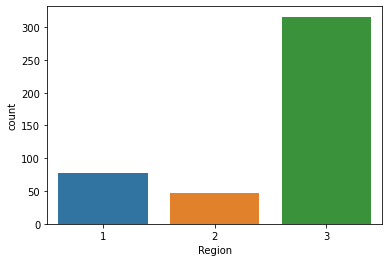

In [27]:
# Apresentation of sales quantity by region
sns.countplot(x='Region', data=sales, )

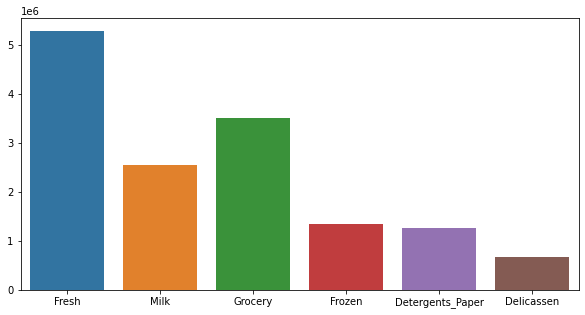

In [70]:
# Product X Max sales value
sum_of_labels = sales.sum().to_list()
sum_of_labels.pop(0)
sum_of_labels.pop(0)

labels = sales.columns.to_list()
labels.pop(0)
labels.pop(0)

plt.figure(figsize=(10,5))
sns.barplot(x=labels, y=sum_of_labels,)

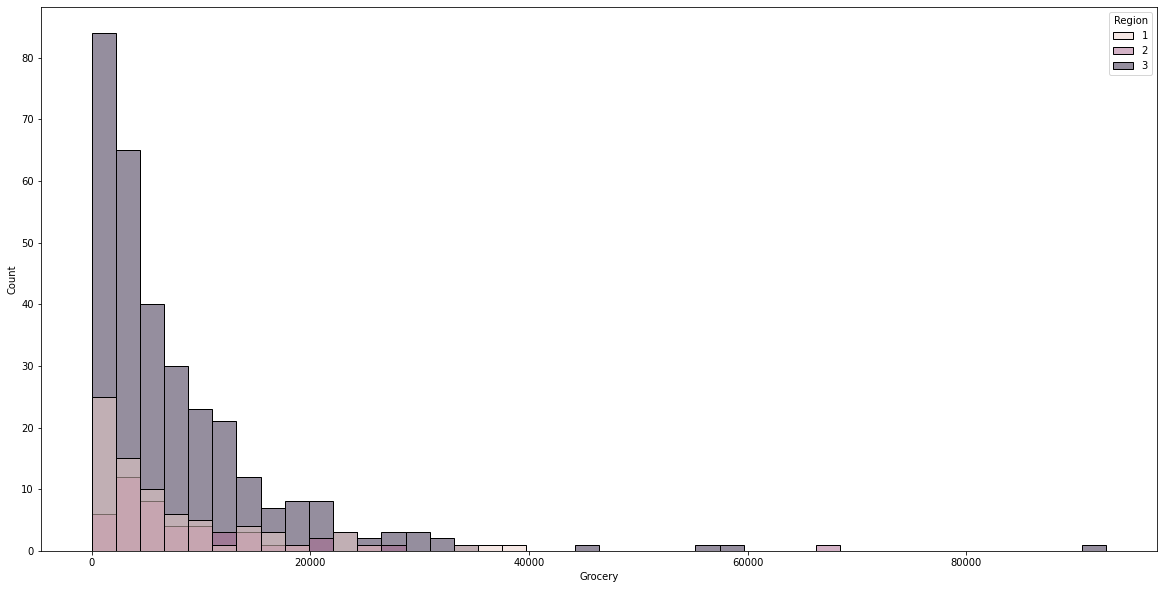

In [76]:
# Checking quantity of grocery product
# We can use any product in for X 
plt.figure(figsize=(20,10))
sns.histplot(data=sales, x='Grocery', hue='Region', stat='count')

In [80]:
# Checking the mean value spent by region
region_1=sales[sales['Region'] == 1]
region_2=sales[sales['Region'] == 2]
region_3=sales[sales['Region'] == 3]

print('Mean value by year at region 1: \n',region_1[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) 
print('Mean value by year at region 2: \n',region_2[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) 
print('Mean value by year at region 3: \n',region_3[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) 


Mean value by year at region 1: 
 Fresh               11101.727273
Milk                 5486.415584
Grocery              7403.077922
Frozen               3000.337662
Detergents_Paper     2651.116883
Delicassen           1354.896104
dtype: float64
Mean value by year at region 2: 
 Fresh               9887.680851
Milk                5088.170213
Grocery             9218.595745
Frozen              4045.361702
Detergents_Paper    3687.468085
Delicassen          1159.702128
dtype: float64
Mean value by year at region 3: 
 Fresh               12533.471519
Milk                 5977.085443
Grocery              7896.363924
Frozen               2944.594937
Detergents_Paper     2817.753165
Delicassen           1620.601266
dtype: float64


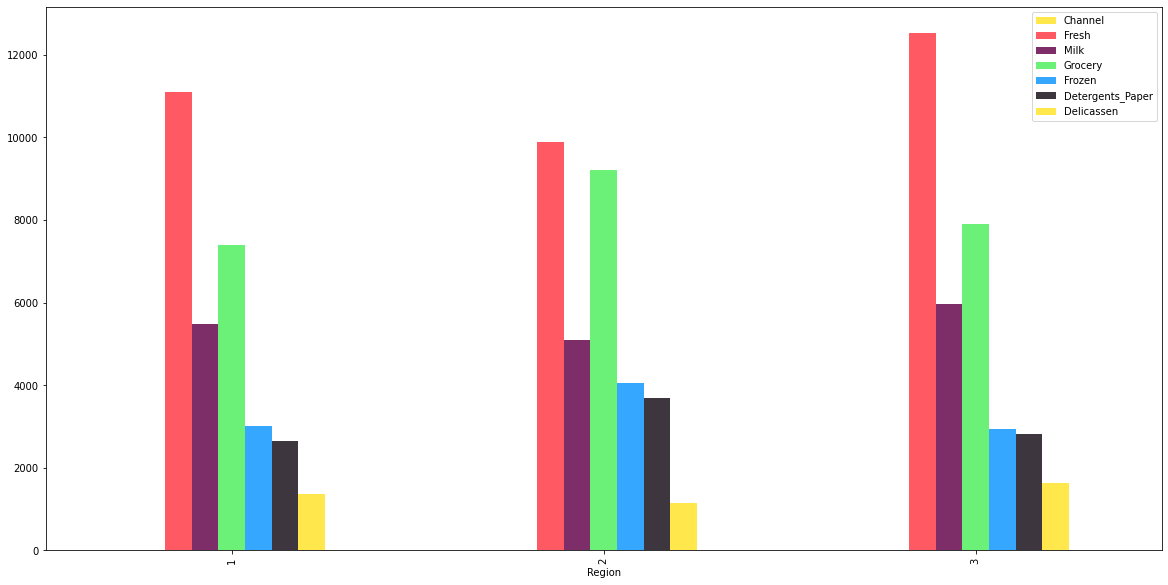

In [100]:
# Grouping the values by region
from itertools import cycle, islice
mean_values_region = sales.groupby(by='Region').mean()
my_colors = ['#ffe74c', '#ff5964', '#7d2e68', '#6bf178', '#35a7ff', '#3e363f']

mean_values_region.plot(kind='bar', figsize=(20,10), color=my_colors)


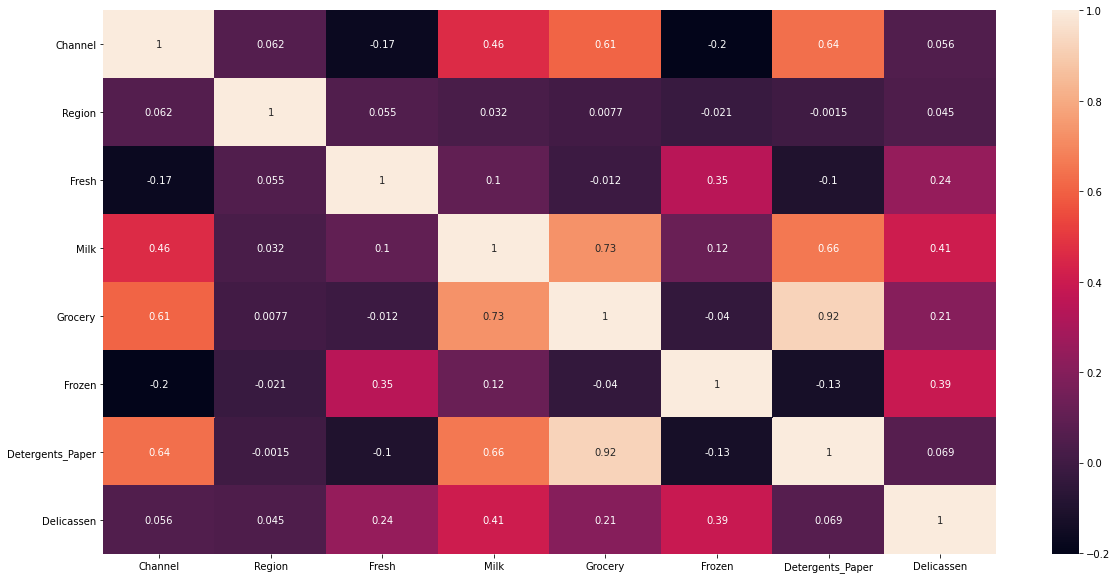

In [6]:
# Heatmap with Person correlation
plt.figure(figsize=(20,10))
sns.heatmap(data=sales.corr(), annot=True)

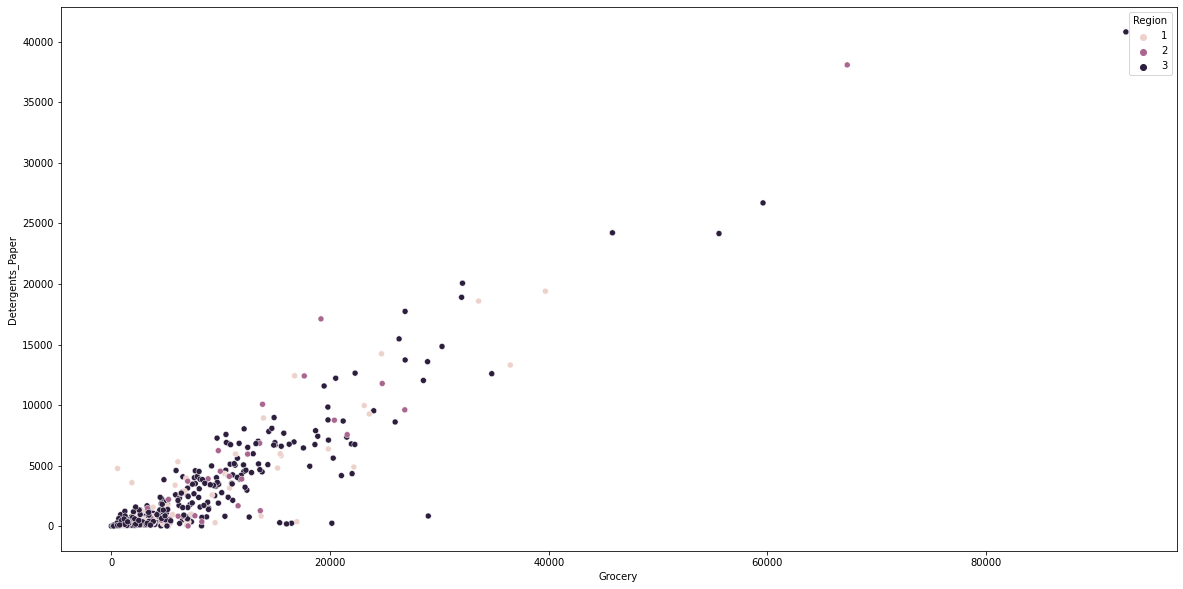

In [10]:
# Based on heatmap, we can plot correlation according with the results shown
# E.g. Grocery and Detergents_Paper, where the corr is almost 1.
plt.figure(figsize=(20,10))
sns.scatterplot(x='Grocery', y='Detergents_Paper', hue='Region', data=sales)

**Linear Regression**

Now, it's time to apply ML concepts to predict some results based upon a random values

In [13]:
# Used to split the data
from sklearn.model_selection import train_test_split
# Model to train the data
from sklearn.linear_model import LinearRegression
# Metrics to measure the result
from sklearn import metrics

In [23]:
# Split the data into train and test values
X_train, X_test, y_train, y_test = train_test_split(sales['Grocery'].values.reshape(-1,1), sales['Detergents_Paper'].values.reshape(-1,1), test_size=0.2, random_state=0)

In [24]:
# Model instantiation
model = LinearRegression()
# Use the train data to train the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

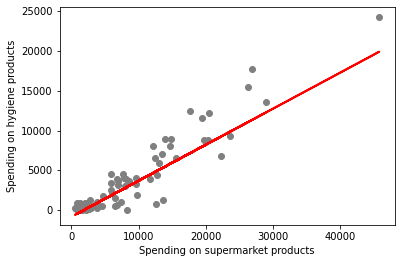

In [26]:
# Initialize the prediction with the data
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Spending on supermarket products')
plt.ylabel('Spending on hygiene products')
plt.show()

In [31]:
print("The line equation is Y = {}*X {}".format(model.coef_[0][0],model.intercept_[0]))

The line equation is Y = 0.452647967855267*X -839.4404680193988


In [32]:
# Using the model to predict a simple value where the client spent 30000 at the supermaket
model.predict(np.array([30000]).reshape(-1,1))

array([[12739.99856764]])

In [33]:
# The last but not least, let's measure the proportion of the variance for y_pred (R^2)
m = metrics.r2_score(y_test, y_pred)
m

0.847492289734609